In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import eda
import random as random
from os.path import join as pjoin

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from utils import utils
#from utils import knn_validation
#from utils import knn_cross_validation
#from utils import nearest_prototypes

DATA_DIR = './data/'

In [ ]:
#test_samples.NativeCountry = pd.Categorical(test_samples.NativeCountry)
    #print(test_samples.NativeCountry.unique())
    #train_samples.NativeCountry = pd.Categorical(train_samples, categories = test_samples.NativeCountry.unique())
    
    #print("after_Categorical")
    #print(test_samples.head(10))

In [86]:
def load_data():
    ## 0. To obtain reproducible results, we set the random seeds
    random.seed(2020)
    np.random.seed(2020)
    ## 1. Load training set

    dataset_file = pjoin(DATA_DIR, 'adult.data')
    testset_file = pjoin(DATA_DIR, 'adult.test')

    train = pd.read_csv(dataset_file, header=None, delimiter=r",\s+", engine='python')
    train.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    test = pd.read_csv(testset_file, header=None, delimiter=r",\s+", engine='python')
    test.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
    ]
    
    return train, test

In [93]:
def data_preprocess(data,is_train):
    data = Education_remove(data)
    data = eda.Capital_merge(data)
    
    data_samples = data.drop(columns="Income")
    
    data_labels = data.Income.map({"<=50K": 0, ">50K": 1})
    if is_train == False:
        data_labels = data.Income.map({"<=50K.": 0, ">50K.": 1})
    
    return data_samples,data_labels

In [88]:
def data_Categorical(data_samples):
    data_samples.WorkClass = pd.Categorical(data_samples.WorkClass)
    data_samples.MaritalStatus = pd.Categorical(data_samples.MaritalStatus)
    data_samples.Occupation = pd.Categorical(data_samples.Occupation)
    data_samples.Relationship = pd.Categorical(data_samples.Relationship)
    data_samples.Race = pd.Categorical(data_samples.Race)
    data_samples.Gender = pd.Categorical(data_samples.Gender)
    data_samples.NativeCountry = pd.Categorical(data_samples.NativeCountry)
    return data_samples

In [102]:
def preprocess(train,test):
    train_samples, train_labels = data_preprocess(train,True)
    test_samples, test_labels = data_preprocess(test,False)
    
    for col in ['WorkClass','MaritalStatus', 'Occupation', 'Relationship','Race','Gender','NativeCountry']:
        le = LabelEncoder()
        train_samples[col] = le.fit_transform(train_samples[col])
        test_samples[col] = le.transform(test_samples[col])
        
    train_samples = data_Categorical(train_samples)
    test_samples = data_Categorical(test_samples)
    
    print(train_samples.info())
    print(test_samples.info())
    print('done')
    return train_samples, train_labels, test_samples, test_labels

In [144]:
from sklearn.preprocessing import OneHotEncoder
def preprocess2(train,test):
    train_samples, train_labels = data_preprocess(train,True)
    test_samples, test_labels = data_preprocess(test,False)
    
    categorical_feature_mask = train_samples.dtypes==object
    ohe = OneHotEncoder(categories = categorical_feature_mask, sparse=False )
    train_ohe = ohe.fit_transform(train_samples)
    test_ohe = ohe.transform(test_samples)
    
    float_feature_mask = train_samples.dtypes!=object
    train_float = train_samples.columns[float_feature_mask]
    test_float = test_samples.columns[float_feature_mask]
    
    train_samples = pd.concat([train_ohe,train_float],axis=1)
    test_samples = pd.concat([test_ohe,test_float],axis=1)
    
    
    print(train_samples.info())
    print(test_samples.info())
    print('done')
    return train_samples, train_labels, test_samples, test_labels

In [139]:
train, test = load_data()

In [140]:
train.head(10)

Age         WorkClass  fnlwgt  Education  EducationNum  \
0   39         State-gov   77516  Bachelors            13   
1   50  Self-emp-not-inc   83311  Bachelors            13   
2   38           Private  215646    HS-grad             9   
3   53           Private  234721       11th             7   
4   28           Private  338409  Bachelors            13   
5   37           Private  284582    Masters            14   
6   49           Private  160187        9th             5   
7   52  Self-emp-not-inc  209642    HS-grad             9   
8   31           Private   45781    Masters            14   
9   42           Private  159449  Bachelors            13   

           MaritalStatus         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry Income  
0         2174            0            40  United-States  <=50K  
1            0            0            13  United-States  <=50K  
2            0            0            40  United-States  <=50K  
3            0            0            40  United-States  <=50K  
4            0            0            40           Cuba  <=50K  
5            0            0            40  United-States  <=50K  
6            0            0            16        Jamaica  <=50K  
7            0            0            45  United-States   >50K  
8        14084            0            50  United-States   >50K  
9         5178            0            40  United-States   >50K

In [146]:
train_samples, train_labels, test_samples, test_labels = preprocess(train,test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            32561 non-null  int64   
 1   WorkClass      32561 non-null  category
 2   fnlwgt         32561 non-null  int64   
 3   EducationNum   32561 non-null  int64   
 4   MaritalStatus  32561 non-null  category
 5   Occupation     32561 non-null  category
 6   Relationship   32561 non-null  category
 7   Race           32561 non-null  category
 8   Gender         32561 non-null  category
 9   HoursPerWeek   32561 non-null  int64   
 10  NativeCountry  32561 non-null  category
 11  CapitalChange  32561 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   A

In [106]:
print(len(train))
print(train.info())


32561
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   WorkClass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   EducationNum   32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Gender         32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HoursPerWeek   32561 non-null  int64 
 13  NativeCountry  32561 non-null  object
 14  Income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [147]:
clf = DecisionTreeClassifier()
clf.fit(train_samples, train_labels)
# Détermination des lamda k sur le jeu de données global
lambdas = clf.cost_complexity_pruning_path(train_samples, train_labels)["ccp_alphas"]
lambdas = np.unique(lambdas)
lambdas_moy = np.sqrt(lambdas[:-1] * lambdas[1:])

In [165]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.utils import check_X_y
from sklearn.model_selection import StratifiedKFold
def decision_tree_cross_validation_accuracies(X, y, lambdas):
    X, y = check_X_y(X, y)
    # Création d'un object `KFold` pour la validation croisée
    kf = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True).split(X,y)
    for train_index, val_index in kf:
        # Création de `X_train`, `y_train`, `X_val` et `y_val`
        X_train = X[train_index, :]
        y_train = y[train_index]
        X_val = X[val_index, :]
        y_val = y[val_index]
        for k, lmb in enumerate(lambdas):
            # Création d'un arbre avec un coefficient coût-complexité
            # égal à `lmb`
            clf = DecisionTreeClassifier(ccp_alpha=lmb)
            # Apprentissage sur l'ensemble d'apprentissage et calcul
            # de la précision sur l'ensemble de validation
            clf.fit(X_train, y_train)
            pred = clf.predict(X_val)
            acc = matthews_corrcoef(y_val, pred)
            yield k, acc

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


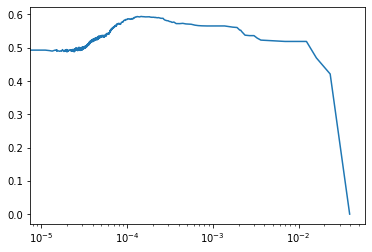

In [166]:
df = pd.DataFrame(
    decision_tree_cross_validation_accuracies(train_samples, train_labels, lambdas_moy),
    columns=["k", "accuracy"],
)
valid = df.groupby("k").mean()
plt.plot(lambdas_moy[valid.index], valid.accuracy)
plt.xscale('log')
plt.show()

In [167]:
from sklearn.tree import plot_tree
lmb = lambdas_moy[valid.accuracy.idxmax()]
clf = DecisionTreeClassifier(ccp_alpha=lmb)
clf.fit(train_samples, train_labels)



DecisionTreeClassifier(ccp_alpha=0.00014611396595043521)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 0 0 ... 1 0 1]


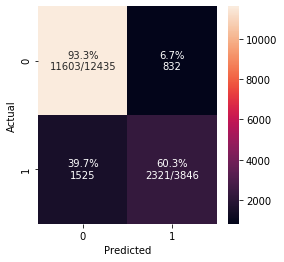

0.8552300227258768


In [168]:
import utils.analysing as AN
from sklearn.metrics import accuracy_score

def test(model,train_samples,train_labels,test_samples,test_labels):
    model.fit(train_samples,train_labels)
    pred = model.predict(test_samples)
    AN.plot_confusion_matrix(test_labels,pred)
    print(accuracy_score(test_labels,pred))

test(clf,train_samples,train_labels,test_samples,test_labels)

(array([10407.,     0., 14466.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

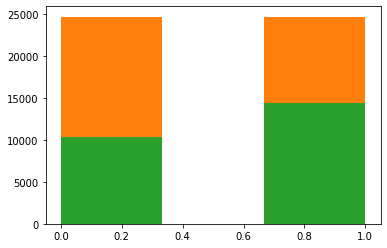

In [169]:
rus = RandomUnderSampler(random_state = 2020)
train_samples_rus, train_labels_rus = rus.fit_sample(train_samples, train_labels)

ros = RandomOverSampler(random_state = 2020)
train_samples_ros, train_labels_ros = ros.fit_sample(train_samples, train_labels)

smote_enn = SMOTEENN(random_state = 2020)
train_samples_smo, train_labels_smo = smote_enn.fit_sample(train_samples, train_labels)

plt.hist(train_labels_rus,bins = 3)
plt.hist(train_labels_ros,bins = 3)
plt.hist(train_labels_smo,bins = 3)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 1 1 ... 1 0 1]


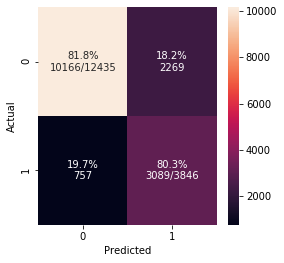

0.8141391806400098


In [170]:
test(clf,train_samples_rus,train_labels_rus,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: Income, Length: 16281, dtype: int64
[0 1 1 ... 1 0 1]


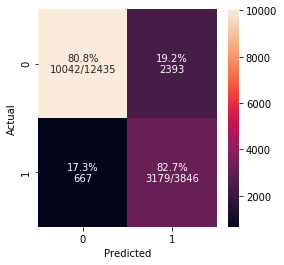

0.8120508568269762


In [171]:
test(clf,train_samples_ros,train_labels_ros,test_samples,test_labels)

In [172]:
test(clf,train_samples_smo,train_labels_smo,test_samples,test_labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [181]:
test_labels.value_counts()

0    12435
1     3846
Name: Income, dtype: int64

In [183]:
test_labels.value_counts()[0]/(test_labels.value_counts()[0]+test_labels.value_counts()[1])

0.7637737239727289